In [1]:
import numpy as np
import pandas as pd
import jcopml
import os
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras.layers import Dense,Activation,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [3]:
#cleaning 
#missing data

nan_data = df[df.isna().any(axis=1)]
nan_data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694910,230804266,01/08/2023 12:00:00 AM,01/08/2023 12:00:00 AM,1030,8,West LA,839,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,10200 SANTA MONICA BL,NaN,34.0611,-118.4184
694911,230109201,03/23/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1830,1,Central,111,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,NaN,NaN,NaN,700 W CESAR E CHAVEZ AV,NaN,34.0606,-118.2439
694912,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
694913,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116


In [4]:
len(df)

694915

In [5]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            95563
Vict Age               0
Vict Sex           91046
Vict Descent       91052
Premis Cd              8
Premis Desc          366
Weapon Used Cd    453481
Weapon Desc       453481
Status                 0
Status Desc            0
Crm Cd 1               9
Crm Cd 2          643099
Crm Cd 3          693168
Crm Cd 4          694863
LOCATION               0
Cross Street      582058
LAT                    0
LON                    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694915 entries, 0 to 694914
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           694915 non-null  int64  
 1   Date Rptd       694915 non-null  object 
 2   DATE OCC        694915 non-null  object 
 3   TIME OCC        694915 non-null  int64  
 4   AREA            694915 non-null  int64  
 5   AREA NAME       694915 non-null  object 
 6   Rpt Dist No     694915 non-null  int64  
 7   Part 1-2        694915 non-null  int64  
 8   Crm Cd          694915 non-null  int64  
 9   Crm Cd Desc     694915 non-null  object 
 10  Mocodes         599352 non-null  object 
 11  Vict Age        694915 non-null  int64  
 12  Vict Sex        603869 non-null  object 
 13  Vict Descent    603863 non-null  object 
 14  Premis Cd       694907 non-null  float64
 15  Premis Desc     694549 non-null  object 
 16  Weapon Used Cd  241434 non-null  float64
 17  Weapon Des

In [7]:
df['Part 1-2'].value_counts().sort_values(ascending = False)

1    405847
2    289068
Name: Part 1-2, dtype: int64

In [8]:
#menghilangkan variabel yang tidak dibutuhkan
df=df.drop(columns=['Date Rptd'], inplace=False,axis=1)
df=df.drop(columns=['DATE OCC'], inplace=False,axis=1)
df=df.drop(columns=['AREA NAME'], inplace=False,axis=1)
df=df.drop(columns=['DR_NO'], inplace=False,axis=1)
df=df.drop(columns=['Crm Cd Desc'], inplace=False,axis=1)
df=df.drop(columns=['Mocodes'], inplace=False,axis=1)
df=df.drop(columns=['Vict Sex'], inplace=False,axis=1)
df=df.drop(columns=['Vict Descent'], inplace=False,axis=1)
df=df.drop(columns=['Premis Cd'], inplace=False,axis=1)
df=df.drop(columns=['Premis Desc'], inplace=False,axis=1)
df=df.drop(columns=['Status'], inplace=False,axis=1)
df=df.drop(columns=['Status Desc'], inplace=False,axis=1)
df=df.drop(columns=['LOCATION'], inplace=False,axis=1)
df=df.drop(columns=['Cross Street'], inplace=False,axis=1)
df=df.drop(columns=['LAT'], inplace=False,axis=1)
df=df.drop(columns=['LON'], inplace=False,axis=1)
df=df.drop(columns=['Weapon Desc'], inplace=False,axis=1)
df=df.drop(columns=['Crm Cd 1'], inplace=False,axis=1)
df=df.drop(columns=['Crm Cd 2'], inplace=False,axis=1)
df=df.drop(columns=['Crm Cd 3'], inplace=False,axis=1)
df=df.drop(columns=['Crm Cd 4'], inplace=False,axis=1)
df=df.drop(columns=['Weapon Used Cd'], inplace=False,axis=1)


In [9]:
df.isnull().sum()

TIME OCC       0
AREA           0
Rpt Dist No    0
Part 1-2       0
Crm Cd         0
Vict Age       0
dtype: int64

In [10]:
df.dropna(inplace=True)
df

,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age
0,2230,3,377,2,624,36
1,330,1,163,2,624,25
2,1200,1,155,2,845,0
3,1730,15,1543,2,745,76
4,415,19,1998,2,740,31
...,...,...,...,...,...,...
694910,1030,8,839,1,341,48
694911,1830,1,111,1,440,27
694912,1800,16,1663,2,740,23
694913,1000,16,1602,1,230,25


In [11]:
#melabelkan data output
df[["TIME OCC",'Part 1-2']] = df[["TIME OCC",'Part 1-2']].apply(LabelEncoder().fit_transform)

#view udpated DataFrame
print(df)

        TIME OCC  AREA  Rpt Dist No  Part 1-2  Crm Cd  Vict Age
0           1349     3          377         1     624        36
1            209     1          163         1     624        25
2            719     1          155         1     845         0
3           1049    15         1543         1     745        76
4            254    19         1998         1     740        31
...          ...   ...          ...       ...     ...       ...
694910       629     8          839         0     341        48
694911      1109     1          111         0     440        27
694912      1079    16         1663         1     740        23
694913       599    16         1602         0     230        25
694914       539     9          914         1     745        53

[694915 rows x 6 columns]


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694915 entries, 0 to 694914
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   TIME OCC     694915 non-null  int64
 1   AREA         694915 non-null  int64
 2   Rpt Dist No  694915 non-null  int64
 3   Part 1-2     694915 non-null  int64
 4   Crm Cd       694915 non-null  int64
 5   Vict Age     694915 non-null  int64
dtypes: int64(6)
memory usage: 31.8 MB


In [13]:
#Normalisasi data variabel "TIME OCC" dengan StandardScaler
columns = ['AREA']
scaler = StandardScaler()
data_scale = scaler.fit_transform(df[columns])
#Memasukan variabel "TIME OCC" yang telah dinormalisasi data ke data aktual
df["TIME OCC"]=data_scale

In [14]:
#Normalisasi data variabel "Rpt Dist No" dengan StandardScaler
columns = ['Rpt Dist No']
scaler = StandardScaler()
data_scale = scaler.fit_transform(df[columns])
#Memasukan variabel "Rpt Dist No" yang telah dinormalisasi data ke data aktual
df["Rpt Dist No"]=data_scale

In [15]:
#Normalisasi data variabel "Crm Cd" dengan StandardScaler
columns = ['Crm Cd']
scaler = StandardScaler()
data_scale = scaler.fit_transform(df[columns])
#Memasukan variabel "Crm Cd" yang telah dinormalisasi data ke data aktual
df["Crm Cd"]=data_scale

In [16]:
#Normalisasi data variabel "Vict Age" dengan StandardScaler
columns = ['Vict Age']
scaler = StandardScaler()
data_scale = scaler.fit_transform(df[columns])
#Memasukan variabel "Vict Age" yang telah dinormalisasi data ke data aktual
df["Vict Age"]=data_scale

In [17]:
X=df.drop(['Part 1-2'],axis=1)
y=df['Part 1-2']

In [18]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=30)
X_rus, y_rus = sm.fit_resample(X, y)


In [19]:
print(X_rus)
print(y_rus)

        TIME OCC  AREA  Rpt Dist No    Crm Cd  Vict Age
0      -1.266607     3    -1.216316  0.593745  0.278020
1      -1.595054     1    -1.567753  0.593745 -0.229138
2      -1.595054     1    -1.580890  1.657031 -1.381771
3       0.704072    15     0.698521  1.175906  2.122232
4       1.360966    19     1.445735  1.151850  0.047494
...          ...   ...          ...       ...       ...
811689 -1.430831     2    -1.393676 -0.705293 -0.183033
811690  1.360966    19     1.404117  0.598050  0.831284
811691 -0.445491     8    -0.367810  0.593745 -0.229138
811692  1.689412    21     1.706849  0.603367 -0.183033
811693 -0.938161     5    -0.993136  0.593745  0.462441

[811694 rows x 5 columns]
0         1
1         1
2         1
3         1
4         1
         ..
811689    1
811690    1
811691    1
811692    1
811693    1
Name: Part 1-2, Length: 811694, dtype: int64


In [20]:
# Import library
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Buat objek RandomOverSampler dan RandomUnderSampler
ros = RandomOverSampler()
rus = RandomUnderSampler()


# RUS pada dataset
X_rus, y_rus = rus.fit_resample(X, y)
print(X_rus, y_rus)

        TIME OCC  AREA  Rpt Dist No    Crm Cd  Vict Age
0       1.689412    21     1.756116 -0.387750 -1.381771
1       0.211403    12     0.214064 -1.301888 -0.690191
2       0.047179    11     0.026850 -0.916988  1.568969
3      -0.281267     9    -0.303237  1.252886  0.324125
4       0.704072    15     0.634475 -0.767839  0.093599
...          ...   ...          ...       ...       ...
578131 -0.281267     9    -0.314733  0.593745  1.015705
578132 -0.445491     8    -0.465818  2.191079  2.168337
578133 -0.445491     8    -0.375495 -0.705293 -0.229138
578134  0.868296    16     0.895589  1.151850 -0.321349
578135 -0.281267     9    -0.334440  1.175906  1.061810

[578136 rows x 5 columns] 0         0
1         0
2         0
3         0
4         0
         ..
578131    1
578132    1
578133    1
578134    1
578135    1
Name: Part 1-2, Length: 578136, dtype: int64


In [21]:
# ROS pada dataset
X_ros, y_ros = ros.fit_resample(X_rus, y_rus)
df=X_ros, y_ros
print(df)

(        TIME OCC  AREA  Rpt Dist No    Crm Cd  Vict Age
0       1.689412    21     1.756116 -0.387750 -1.381771
1       0.211403    12     0.214064 -1.301888 -0.690191
2       0.047179    11     0.026850 -0.916988  1.568969
3      -0.281267     9    -0.303237  1.252886  0.324125
4       0.704072    15     0.634475 -0.767839  0.093599
...          ...   ...          ...       ...       ...
578131 -0.281267     9    -0.314733  0.593745  1.015705
578132 -0.445491     8    -0.465818  2.191079  2.168337
578133 -0.445491     8    -0.375495 -0.705293 -0.229138
578134  0.868296    16     0.895589  1.151850 -0.321349
578135 -0.281267     9    -0.334440  1.175906  1.061810

[578136 rows x 5 columns], 0         0
1         0
2         0
3         0
4         0
         ..
578131    1
578132    1
578133    1
578134    1
578135    1
Name: Part 1-2, Length: 578136, dtype: int64)


In [22]:
df

(        TIME OCC  AREA  Rpt Dist No    Crm Cd  Vict Age
 0       1.689412    21     1.756116 -0.387750 -1.381771
 1       0.211403    12     0.214064 -1.301888 -0.690191
 2       0.047179    11     0.026850 -0.916988  1.568969
 3      -0.281267     9    -0.303237  1.252886  0.324125
 4       0.704072    15     0.634475 -0.767839  0.093599
 ...          ...   ...          ...       ...       ...
 578131 -0.281267     9    -0.314733  0.593745  1.015705
 578132 -0.445491     8    -0.465818  2.191079  2.168337
 578133 -0.445491     8    -0.375495 -0.705293 -0.229138
 578134  0.868296    16     0.895589  1.151850 -0.321349
 578135 -0.281267     9    -0.334440  1.175906  1.061810
 
 [578136 rows x 5 columns],
 0         0
 1         0
 2         0
 3         0
 4         0
          ..
 578131    1
 578132    1
 578133    1
 578134    1
 578135    1
 Name: Part 1-2, Length: 578136, dtype: int64)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((625423, 5), (69492, 5), (625423,), (69492,))

In [24]:
#melabelkan
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [25]:
y_test

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [26]:
#Mendefinisikan Model 

import keras
from keras.utils import np_utils
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow.keras.layers import Dense, Activation, Dropout

In [27]:
model = Sequential()
model.add(Dense(5,activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='sigmoid')) # gunakan softmax: output > 1,
                                         # gunakan sigmoid: output = 1 
model.compile(loss ='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 4)                 24        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
Total params: 124
Trainable params: 124
Non-trainable pa

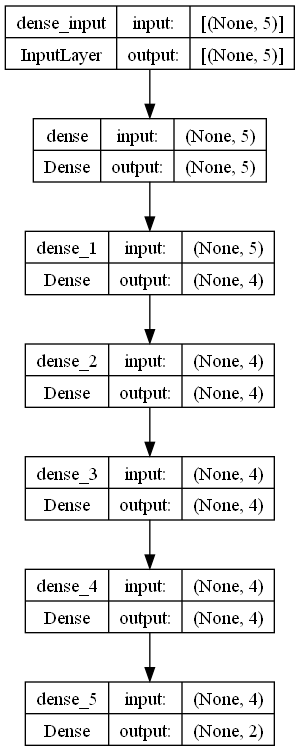

In [28]:
plot_model(model, show_shapes=True)

In [29]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
4887/4887 [==============================] - 11s 2ms/step - loss: 0.2700 - accuracy: 0.8983 - val_loss: 0.1548 - val_accuracy: 0.9130
Epoch 2/100
4887/4887 [==============================] - 9s 2ms/step - loss: 0.0873 - accuracy: 0.9791 - val_loss: 0.0649 - val_accuracy: 0.9838
Epoch 3/100
4887/4887 [==============================] - 9s 2ms/step - loss: 0.0666 - accuracy: 0.9836 - val_loss: 0.0638 - val_accuracy: 0.9855
Epoch 4/100
4887/4887 [==============================] - 9s 2ms/step - loss: 0.0646 - accuracy: 0.9840 - val_loss: 0.0736 - val_accuracy: 0.9804
Epoch 5/100
4887/4887 [==============================] - 9s 2ms/step - loss: 0.0636 - accuracy: 0.9844 - val_loss: 0.0597 - val_accuracy: 0.9861
Epoch 6/100
4887/4887 [==============================] - 9s 2ms/step - loss: 0.0628 - accuracy: 0.9848 - val_loss: 0.0648 - val_accuracy: 0.9839
Epoch 7/100
4887/4887 [==============================] - 10s 2ms/step - loss: 0.0612 - accuracy: 0.9853 - val_loss: 0.0569 - val_

Epoch 57/100
4887/4887 [==============================] - 10s 2ms/step - loss: 0.0375 - accuracy: 0.9878 - val_loss: 0.0347 - val_accuracy: 0.9893
Epoch 58/100
4887/4887 [==============================] - 10s 2ms/step - loss: 0.0373 - accuracy: 0.9879 - val_loss: 0.0336 - val_accuracy: 0.9895
Epoch 59/100
4887/4887 [==============================] - 10s 2ms/step - loss: 0.0378 - accuracy: 0.9878 - val_loss: 0.0327 - val_accuracy: 0.9896
Epoch 60/100
4887/4887 [==============================] - 10s 2ms/step - loss: 0.0369 - accuracy: 0.9879 - val_loss: 0.0333 - val_accuracy: 0.9882
Epoch 61/100
4887/4887 [==============================] - 11s 2ms/step - loss: 0.0363 - accuracy: 0.9880 - val_loss: 0.0363 - val_accuracy: 0.9866
Epoch 62/100
4887/4887 [==============================] - 13s 3ms/step - loss: 0.0373 - accuracy: 0.9879 - val_loss: 0.0392 - val_accuracy: 0.9860
Epoch 63/100
4887/4887 [==============================] - 12s 3ms/step - loss: 0.0372 - accuracy: 0.9879 - val_loss: 0

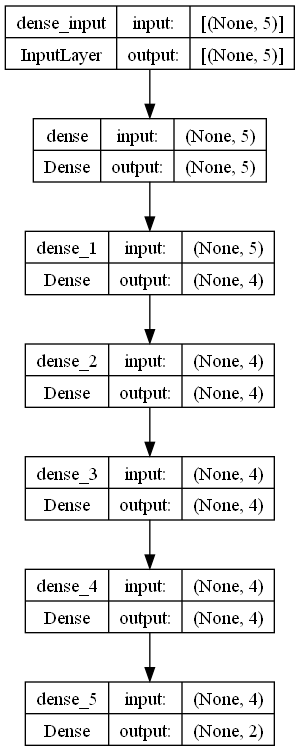

In [30]:
plot_model(model, show_shapes=True)

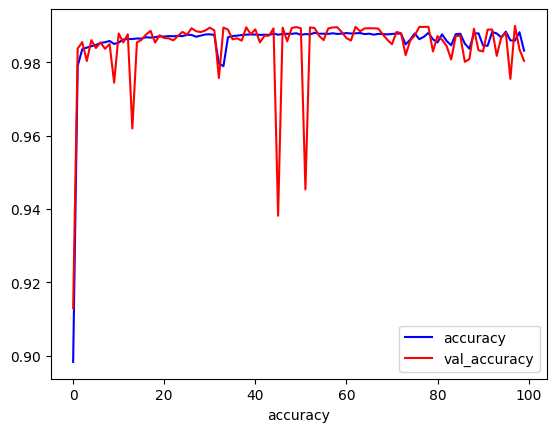

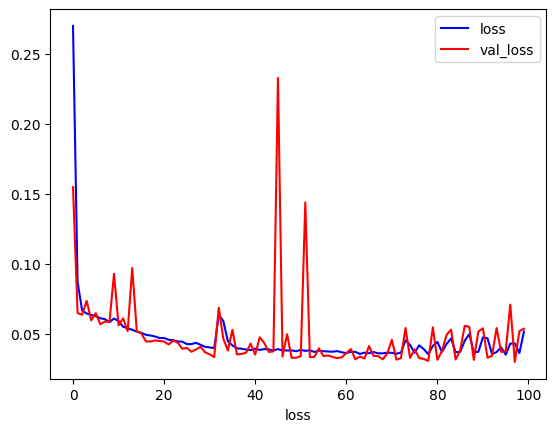

In [31]:
def plot_graphs(history, string):
    plt.plot(history.history[string], color = 'blue')
    plt.plot(history.history['val_'+string], color = 'red')
    plt.xlabel('epoch')
    plt.xlabel(string)
    plt.legend([string, "val_"+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [32]:
evaluation = model.evaluate(X_test, y_test)

2172/2172 [==============================] - 3s 1ms/step - loss: 0.0538 - accuracy: 0.9804


In [33]:
ann_pred = np.argmax(model.predict(X_test),axis=1)
ann_pred

2172/2172 [==============================] - 3s 1ms/step


array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [34]:
y_test = np.argmax(y_test,axis=1)
y_test

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [35]:
# for checking testing results
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix


print ('accuracy_score: ',accuracy_score(y_test,ann_pred))
print ('f1_score: ',f1_score(y_test,ann_pred, pos_label='positive', average='micro'))
print ('recall_score: ',recall_score(y_test,ann_pred, pos_label='positive', average='micro'))
print ('precision_score: ',precision_score(y_test,ann_pred, pos_label='positive', average='micro'))

accuracy_score:  0.9802567201980084
f1_score:  0.9802567201980084
recall_score:  0.9802567201980084
precision_score:  0.9802567201980084


C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [36]:
print(classification_report(y_test, ann_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     40488
           1       0.98      0.97      0.98     29004

    accuracy                           0.98     69492
   macro avg       0.98      0.98      0.98     69492
weighted avg       0.98      0.98      0.98     69492



In [37]:
cm = confusion_matrix(y_test, ann_pred)
cm

array([[39949,   539],
       [  833, 28171]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Model')

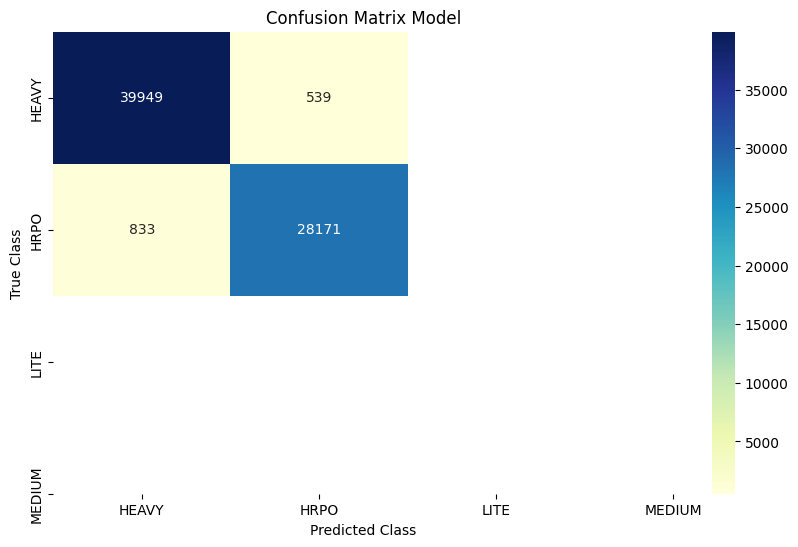

In [38]:
fig = plt.figure(figsize = (10, 6))
target_names=['HEAVY', 'HRPO', 'LITE', 'MEDIUM']
sns.heatmap(cm, annot = True, fmt = "d", cmap= 'YlGnBu', yticklabels=target_names, xticklabels=target_names)

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")

# CLUSTERING

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from yellowbrick.cluster import KElbowVisualizer

In [40]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694910,230804266,01/08/2023 12:00:00 AM,01/08/2023 12:00:00 AM,1030,8,West LA,839,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,10200 SANTA MONICA BL,NaN,34.0611,-118.4184
694911,230109201,03/23/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1830,1,Central,111,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,NaN,NaN,NaN,700 W CESAR E CHAVEZ AV,NaN,34.0606,-118.2439
694912,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
694913,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116


In [41]:
scaler = StandardScaler()

In [42]:
kolom=['TIME OCC', 'AREA', 'Rpt Dist No', 'Crm Cd', 'Vict Age']
scaled_ds=scaler.fit_transform(df[kolom])
scaled_ds

array([[ 1.36975412, -1.26660734, -1.21631583,  0.59374463,  0.27802006],
       [-1.5342424 , -1.59505397, -1.5677525 ,  0.59374463, -0.22913828],
       [-0.20451768, -1.59505397, -1.58089032,  1.65703067, -1.38177085],
       ...,
       [ 0.71253386,  0.86829581,  0.89558869,  1.15184952, -0.32134888],
       [-0.51020152,  0.86829581,  0.79541282, -1.3018875 , -0.22913828],
       [-0.66304345, -0.28126742, -0.33443968,  1.17590576,  1.06181021]])

In [43]:
df[kolom]=scaled_ds
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,1.369754,-1.266607,Southwest,-1.216316,2,0.593745,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,-1.534242,-1.595054,Central,-1.567753,2,0.593745,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,-0.204518,-1.595054,Central,-1.580890,2,1.657031,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,0.605545,0.704072,N Hollywood,0.698521,2,1.175906,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,-1.404327,1.360966,Mission,1.445735,2,1.151850,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694910,230804266,01/08/2023 12:00:00 AM,01/08/2023 12:00:00 AM,-0.464349,-0.445491,West LA,-0.457607,1,-0.767839,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,10200 SANTA MONICA BL,NaN,34.0611,-118.4184
694911,230109201,03/23/2023 12:00:00 AM,03/22/2023 12:00:00 AM,0.758386,-1.595054,Central,-1.653148,1,-0.291525,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,NaN,NaN,NaN,700 W CESAR E CHAVEZ AV,NaN,34.0606,-118.2439
694912,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,0.712534,0.868296,Foothill,0.895589,2,1.151850,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
694913,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,-0.510202,0.868296,Foothill,0.795413,1,-1.301888,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116


In [44]:
columns = ['Date Rptd', 'DATE OCC', 'AREA NAME', 'DR_NO', 'Crm Cd Desc', 'Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Status','Status Desc', 'LOCATION', 'Cross Street', 'LAT', 'LON', 'Weapon Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Weapon Used Cd']

df.drop(columns=columns, inplace=True)
df

,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age
0,1.369754,-1.266607,-1.216316,2,0.593745,0.278020
1,-1.534242,-1.595054,-1.567753,2,0.593745,-0.229138
2,-0.204518,-1.595054,-1.580890,2,1.657031,-1.381771
3,0.605545,0.704072,0.698521,2,1.175906,2.122232
4,-1.404327,1.360966,1.445735,2,1.151850,0.047494
...,...,...,...,...,...,...
694910,-0.464349,-0.445491,-0.457607,1,-0.767839,0.831284
694911,0.758386,-1.595054,-1.653148,1,-0.291525,-0.136928
694912,0.712534,0.868296,0.895589,2,1.151850,-0.321349
694913,-0.510202,0.868296,0.795413,1,-1.301888,-0.229138


In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
PCA_ds = pd.DataFrame(pca.transform(df), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,694915.0,-7.280120e-17,1.414049,-2.343311,-1.141562,0.060897,1.195349,2.510045
col2,694915.0,-4.498950e-17,1.066439,-2.136364,-0.820279,-0.362850,0.909262,2.789155


In [46]:
PCA_ds.info()
PCA_ds

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694915 entries, 0 to 694914
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   col1    694915 non-null  float64
 1   col2    694915 non-null  float64
dtypes: float64(2)
memory usage: 10.6 MB


,col1,col2
0,-1.744437,0.823228
1,-2.238329,0.727721
2,-2.269813,1.491631
3,1.042511,1.665810
4,1.988658,1.256666
...,...,...
694910,-0.624028,-0.699873
694911,-2.301068,-0.426066
694912,1.245166,1.200473
694913,1.166749,-1.391308


Elbow Method to determine the number of clusters to be formed:


C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

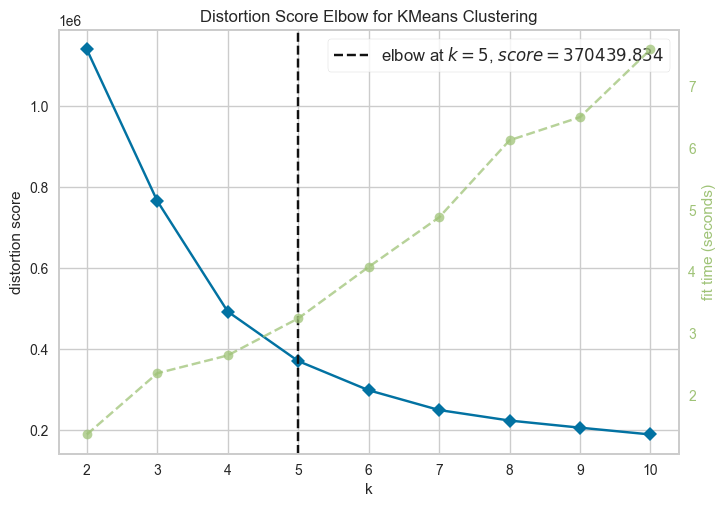

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [48]:
# inisialisasi model k-means dengan jumlah cluster yang telah di ditentukan
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(PCA_ds)

C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
PCA_ds['Label']=label
PCA_ds

,col1,col2,Label
0,-1.744437,0.823228,1
1,-2.238329,0.727721,1
2,-2.269813,1.491631,1
3,1.042511,1.665810,0
4,1.988658,1.256666,0
...,...,...,...
694910,-0.624028,-0.699873,3
694911,-2.301068,-0.426066,3
694912,1.245166,1.200473,0
694913,1.166749,-1.391308,2


In [50]:
PCA_ds['Label'].value_counts()

2    229895
3    209515
0    131714
1    123791
Name: Label, dtype: int64

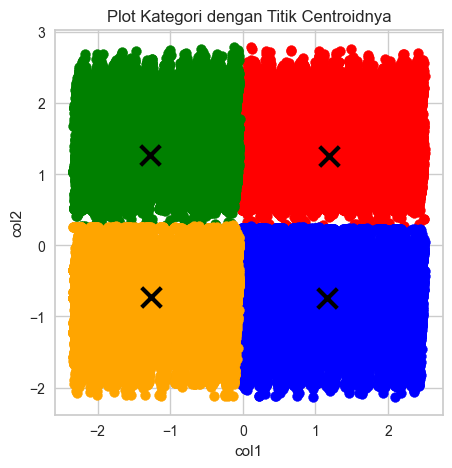

In [51]:
# Menghitung titik centroid untuk setiap kategori
centroids = PCA_ds.groupby('Label')[['col1', 'col2']].mean()

# Membuat plot untuk masing-masing kategori dan centroid
fig, ax = plt.subplots(figsize=(5, 5))
colors = ['red', 'green', 'blue', 'orange', 'purple']
for label, color in enumerate(colors[:len(centroids)]):
    indices = PCA_ds['Label'] == label
    ax.scatter(PCA_ds.loc[indices, 'col1'], PCA_ds.loc[indices, 'col2'], c=color, s=50)
    centroid = centroids.loc[label]
    ax.scatter(centroid[0], centroid[1], marker='x', s=200, linewidths=3, color='black')

# Menambahkan judul dan label sumbu
ax.set_title('Plot Kategori dengan Titik Centroidnya')
ax.set_xlabel('col1')
ax.set_ylabel('col2')

# Menampilkan plot
plt.show()

# Model Regresi

In [52]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class="auto")
logreg.fit(X_test, y_test)

LogisticRegression()

In [53]:
print("coefficents :",logreg.coef_ )
print("intercept :", logreg.intercept_)

coefficents : [[ 0.10240427 -0.02884735  0.1015403   2.53657915  0.82411829]]
intercept : [-0.0609571]


In [54]:
logreg.predict_proba(X_test)[0:5]

array([[0.90296987, 0.09703013],
       [0.80052215, 0.19947785],
       [0.36870907, 0.63129093],
       [0.80986935, 0.19013065],
       [0.92489033, 0.07510967]])

In [55]:
prediksi=logreg.predict(X_test)

In [56]:
print(accuracy_score(y_test,prediksi))

0.8961463190007483


In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
from sklearn.metrics import r2_score

# Evaluate Parameter Model 
print('accuracy_score: ',accuracy_score(y_test, ann_pred))
print('f1_score: ',f1_score(y_test, ann_pred, pos_label='positive', average='micro'))
print('recall_score: ',recall_score(y_test, ann_pred, pos_label='positive', average='micro'))
print('precision_score: ',precision_score(y_test, ann_pred, pos_label='positive', average='micro'))
print("mean squared error (MSE) : %.2f "% mean_squared_error(y_test, ann_pred))
print("mean absolute error (MAE) : %.2f "% mean_absolute_error(y_test, ann_pred))
print("roots mean squared error (RMSE) : %.2f "% math.sqrt(mean_squared_error(y_test, ann_pred)))
print("r2_score : %.2f "% r2_score(y_test, ann_pred))

accuracy_score:  0.9802567201980084
f1_score:  0.9802567201980084
recall_score:  0.9802567201980084
precision_score:  0.9802567201980084
mean squared error (MSE) : 0.02 
mean absolute error (MAE) : 0.02 
roots mean squared error (RMSE) : 0.14 
r2_score : 0.92 


C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [58]:
import pickle

In [59]:
fillname2="ANN_model.pkl"
pickle.dump(model, open(fillname2,"wb"))

In [60]:
fillname3="MLR_model.pkl"
pickle.dump(logreg, open(fillname3,"wb"))

In [61]:
fillname4="klaster_model.pkl"
pickle.dump(kmeans, open(fillname4,"wb"))

In [62]:
fillname12="ANN_model.sav"
pickle.dump(model, open(fillname12,"wb"))

In [63]:
fillname13="MLR_model.sav"
pickle.dump(logreg, open(fillname13,"wb"))

In [64]:
fillname14="klaster_model.sav"
pickle.dump(kmeans, open(fillname14,"wb"))